In [8]:
import torch
import numpy as np

In [9]:
device = "cuda:3" if torch.cuda.is_available() else "cpu"
dtype = torch.float32

ctx = torch.zeros([], device=device, dtype=dtype)

In [10]:
from bgmol.datasets import Ala2TSF300

target_energy = Ala2TSF300().get_energy_model(n_workers=1)

Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb


In [4]:
import mdtraj
constrained_samples_traj = mdtraj.load('constrained_samples.dcd', top='ala2_fromURL.pdb')
my_traj = mdtraj.load('obcimplicit.dcd', top='ala2_fromURL.pdb',stride=286)
constrained_once_samples_traj = mdtraj.load('mysamples_traj_correctedonce.dcd', top='ala2_fromURL.pdb', stride = 10)
TSF_samples_traj = mdtraj.load('TSF_stride35_samplestraj.dcd', top='ala2_fromURL.pdb')
my_samplesfull_traj = mdtraj.load('mytraj_full_samplestraj.dcd',top='ala2_fromURL.pdb')
my_samplesstride10_traj = mdtraj.load('obcstride10Samplestraj.dcd',top='ala2_fromURL.pdb',stride = 10)
constrained_TSFsamples_traj = mdtraj.load('constrained_samples_TSF.dcd',top='ala2_fromURL.pdb',stride = 10)
new_constr_samples_TSF_traj = mdtraj.load('constr_samples/newconstr_samples_TSF.dcd',top='ala2_fromURL.pdb')
#print(constrained_samples_traj,my_traj,my_samples_traj,TSF_samples_traj)

In [19]:
TSF_stride4_repeat2 = mdtraj.load('TSFtraj_stride4_repeat2_samplestraj.dcd', top='ala2_fromURL.pdb')
TSF_stride4_repeat1 = mdtraj.load('TSFtraj_stride4_samplestraj.dcd',top='ala2_fromURL.pdb')
TSF_stride4_repeat3 = mdtraj.load('TSFtraj_stride4_repeat3_samplestraj.dcd',top='ala2_fromURL.pdb')
TSF_stride4_repeat4 = mdtraj.load('TSFtraj_stride4_repeat4_n1_samplestraj.dcd', top='ala2_fromURL.pdb')
TSF_stride4_repeat5 = mdtraj.load('TSFtraj_stride4_repeat1_n1_newGPU_samplestraj.dcd', top='ala2_fromURL.pdb')
TSF_stride4_repeat6 = mdtraj.load('TSFtraj_stride4_repeat2_n1_newGPU_samplestraj.dcd', top='ala2_fromURL.pdb')
TSF_stride4_repeat7 = mdtraj.load('TSFtraj_stride4_repeat3_n1_newGPU_samplestraj.dcd', top='ala2_fromURL.pdb')
TSF_MD = mdtraj.load('TSFtraj.dcd',top='ala2_fromURL.pdb', stride=100)


In [1]:
import mdtraj
orig_rep1 = mdtraj.load('orig_samples_nb_manyworkers1.dcd', top='ala2_fromURL.pdb')
orig_rep2 = mdtraj.load('orig_samples_nb_manyworkers2.dcd',top='ala2_fromURL.pdb')
orig_rep3 = mdtraj.load('orig_samples_nb_manyworkers3.dcd',top='ala2_fromURL.pdb')

TSF_MD = mdtraj.load('TSFtraj.dcd',top='ala2_fromURL.pdb', stride=100)

In [11]:
def get_energies(trajectory, target_energy):
    coordinates = trajectory.xyz
    data = torch.tensor(coordinates.reshape(-1,66)).to(ctx)
    return target_energy.energy(data).cpu().detach().numpy()

In [10]:
def average_energy(trajectory, target_energy):
    coordinates = trajectory.xyz
    data = torch.tensor(coordinates.reshape(-1,66)).to(ctx)
    energies = target_energy.energy(data).cpu().detach().numpy()
    return np.average(energies)

In [6]:
energies = get_energies(TSF_samples_traj,target_energy)
avg = np.average(energies)

NameError: name 'get_energies' is not defined

In [4]:
import matplotlib.pyplot as plt

In [14]:
def plot_energy(ax, 
        repeat1_data,
        repeat2_data, 
        repeat3_data, 
        #repeat4_data, 
        #repeat5_data, 
        #repeat6_data, 
        #repeat7_data, 
        #mysamples_data, 
        #TSF_samples_data,
        MD_data):
    
    #my_samples_energies = get_energies(my_samples_data, target_energy)
    #TSF_samples_energies = get_energies(TSF_samples_data, target_energy)
    #my_samples_energies = get_energies(mysamples_data, target_energy)
    #constr_samples_energies = get_energies(constr_data, target_energy)
    repeat1_energies = get_energies(repeat1_data, target_energy)
    repeat2_energies = get_energies(repeat2_data, target_energy)
    repeat3_energies = get_energies(repeat3_data, target_energy)
    #repeat4_energies = get_energies(repeat4_data, target_energy)
    #repeat5_energies = get_energies(repeat5_data, target_energy)
    #repeat6_energies = get_energies(repeat6_data, target_energy)
    #repeat7_energies = get_energies(repeat7_data, target_energy)
    MD_energies = get_energies(MD_data, target_energy)
    
    dataset_energies = []
    #for dataset in datasets:
        #dataset_energies.append(get_energies(dataset,target_energy))

    
    cut = max(np.percentile(repeat1_energies, 95), 
        #np.percentile(my_energies,80),
        #np.percentile(my_samples_energies,80),
        np.percentile(repeat2_energies,95),
        np.percentile(repeat3_energies,95),
        #np.percentile(repeat5_energies,95),
        #np.percentile(repeat6_energies,95),
        #np.percentile(constr_samples_energies,80),
        20
        )
    
    ax.set_xlabel("Energy   [$k_B T$]")
    # y-axis on the right
    #ax2 = plt.twinx(ax)
    #ax.get_yaxis().set_visible(False)
    ax.hist(MD_energies, range=(-50 ,cut), bins=40, density=False, label="MD data",alpha=1)
    #ax.hist(my_samples_energies, range=(-50 ,cut), bins=40, density=False, label="BG samples trained on my MD", alpha = 1)
    
    ax.hist(repeat1_energies, range=(-50 ,cut), bins=40, density=False, label="BG samples from original notebook, n_workers left at default\nrun from notebook, kernel restart between each",alpha=0.6)
    ax.hist(repeat2_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 2", alpha = 0.6)
    ax.hist(repeat3_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 3", alpha = 0.6)
    #ax.hist(repeat4_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 4, set n_workers=1", alpha = 0.6)
    #ax.hist(repeat5_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 5 after restart n_workers=1",alpha=0.6)
    #ax.hist(repeat6_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 6 after restart n_workers=1",alpha=0.6)
    #ax.hist(repeat7_energies, range=(-50 ,cut), bins=40, density=False, label="repeat 7 after restart n_workers=1",alpha=0.6)
    
    #ax.hist(my_samples_energies, range=(-50 ,cut), bins=40, density=False, label="BG samples trained on 286294 snapshots my data",alpha=0.6)

    #ax.hist(TSF_samples_energies, range=(-50 ,cut), bins=40, density=False, label="old TSF data, trained on 28572 snapshots", alpha = 0.6)


    ax.set_ylabel(f"Count   [#Samples / 10000]")
    ax.legend(bbox_to_anchor = (1.04,1), loc='upper left')

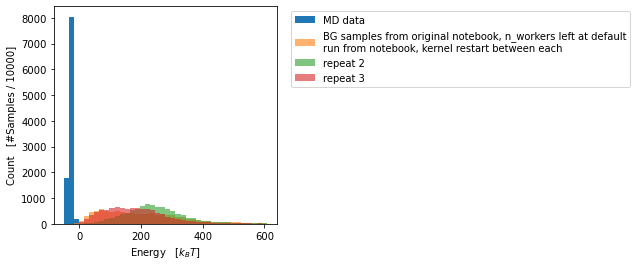

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

plot_energy(ax, #constrained_samples_traj,
    #my_samples_traj,
    orig_rep1,
    orig_rep2,
    orig_rep3,
    #TSF_stride4_repeat3,
    #TSF_stride4_repeat4,
    #TSF_stride4_repeat5,
    #TSF_stride4_repeat6,
    #TSF_stride4_repeat7,
    #my_samplesfull_traj,
    #TSF_samples_traj,
    TSF_MD)
#plt.savefig('Repeatability/3repeatTSFstride4.png',bbox_inches='tight')
